In [33]:
import scanpy as scp
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
adata = scp.read_h5ad('S_prepared.h5ad')

In [3]:
adata = adata[~adata.obs['cluster_name'].isin(['18: Unk_1', '19: Unk_2'])]

In [4]:
adata.obs['aggregated'] = 'Proximal_Tubule'

/var/folders/5y/5gmkj36s11v1y774zthcythh0000gn/T/ipykernel_7957/2452091644.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['aggregated'] = 'Proximal_Tubule'


In [5]:
adata.obs.cluster_name.value_counts()

0: PC-CD/CNT     4120
1: PT_1          2849
2: TAL_1         2385
3: TAL_2         2357
4: DCT_1         1852
5: EC            1749
6: PT_3/PEC      1716
7: PT_4          1638
8: PT_2          1284
9: vSMC/Fib      1187
10: T-Cell       1163
11: IC-A         1120
12: Pod           785
13: B-Cell        566
14: Mac           548
15: IC-B          545
16: DCT_2         258
17: Mast-Cell     225
Name: cluster_name, dtype: int64

In [6]:
adata.obs['aggregated'][adata.obs.cluster_name == '2: TAL_1'] = "Loop_of_Henle"
adata.obs['aggregated'][adata.obs.cluster_name == '3: TAL_2'] = "Loop_of_Henle"

adata.obs['aggregated'][adata.obs.cluster_name == '4: DCT_1'] = "Distal_Tubule"
adata.obs['aggregated'][adata.obs.cluster_name == '5: EC'] = "Endothelial_cells"

adata.obs['aggregated'][adata.obs.cluster_name == '9: vSMC/Fib'] = "Vascular_and_Interstitial"
adata.obs['aggregated'][adata.obs.cluster_name == '10: T-Cell'] = "Leukocytes"

adata.obs['aggregated'][adata.obs.cluster_name == '11: IC-A'] = "Connecting_segment_&_collecting_duct"
adata.obs['aggregated'][adata.obs.cluster_name == '12: Pod'] = "Podocytes"

adata.obs['aggregated'][adata.obs.cluster_name == '13: B-Cell'] = "Leukocytes"
adata.obs['aggregated'][adata.obs.cluster_name == '14: Mac'] = "Leukocytes"

adata.obs['aggregated'][adata.obs.cluster_name == '15: IC-B'] = "Connecting_segment_&_collecting_duct"
adata.obs['aggregated'][adata.obs.cluster_name == '16: DCT_2'] = "Distal_Tubule"

adata.obs['aggregated'][adata.obs.cluster_name == '17: Mast-Cell'] = "Leukocytes"
adata.obs['aggregated'][adata.obs.cluster_name == '0: PC-CD/CNT'] = "Connecting_segment_&_collecting_duct"

/var/folders/5y/5gmkj36s11v1y774zthcythh0000gn/T/ipykernel_7957/494696523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['aggregated'][adata.obs.cluster_name == '2: TAL_1'] = "Loop_of_Henle"
/var/folders/5y/5gmkj36s11v1y774zthcythh0000gn/T/ipykernel_7957/494696523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['aggregated'][adata.obs.cluster_name == '3: TAL_2'] = "Loop_of_Henle"
/var/folders/5y/5gmkj36s11v1y774zthcythh0000gn/T/ipykernel_7957/494696523.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [7]:
data = adata[~adata.obs['aggregated'].isin(['Leukocytes'])]

In [9]:
data

View of AnnData object with n_obs × n_vars = 23845 × 24504
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'Dissociation', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'init_assign', 'final_Ident', 'lab', 'orig.ident2', 'final_Ident2', 'ident', 'cluster_name', 'scrublet', 'treatment', 'aggregated'
    uns: 'Phase_colors', 'X_name', 'cluster_name_colors', 'ident_colors', 'orig.ident2_colors', 'orig.ident_colors', 'rank_genes_groupscluster_name'
    obsm: 'HARMONY', 'PCA', 'UMAP'
    layers: 'logcounts'

In [10]:
sen_gen = ['CDKN1A',
            'CDKN2A',
            'CDKN2B',
            'BCL2',
            'CCL2',
            'CXCL8',
            'IL1A',
            'IL1B',
            'IL6',
            'NFKB1',
            'PDGFA',
            'TP53']


Proximal_Tubule


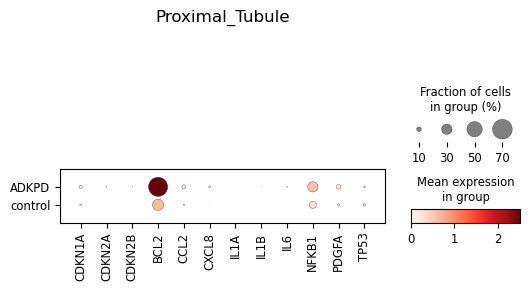

Connecting_segment_&_collecting_duct


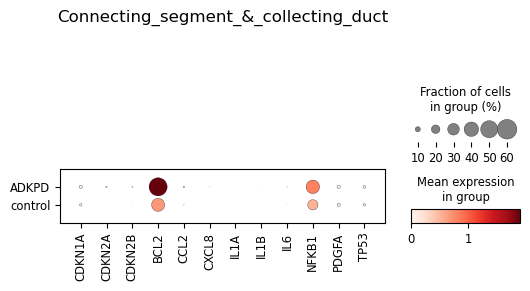

Loop_of_Henle


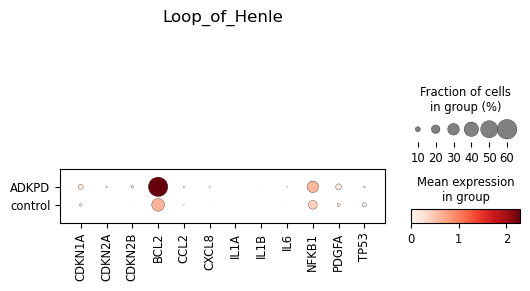

Distal_Tubule


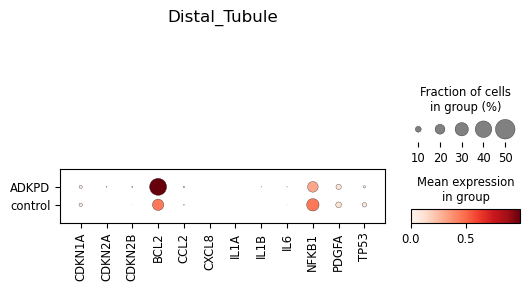

Endothelial_cells


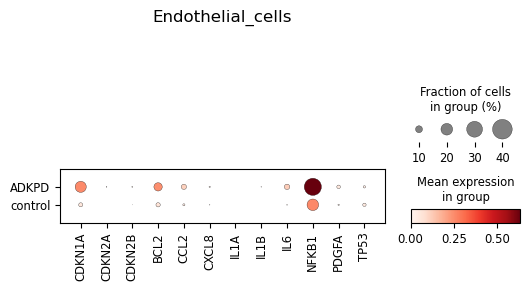

Vascular_and_Interstitial


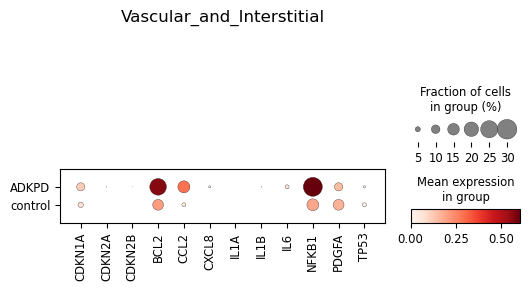

Podocytes


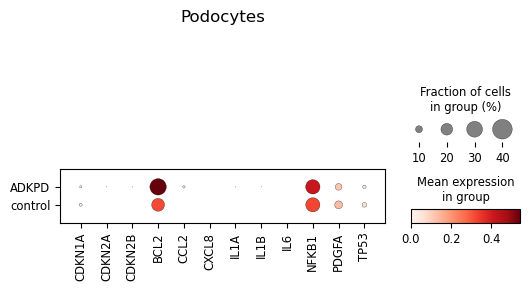

In [29]:
clus = ['Proximal_Tubule', 'Connecting_segment_&_collecting_duct',
       'Loop_of_Henle', 'Distal_Tubule', 'Endothelial_cells',
      'Vascular_and_Interstitial', 'Podocytes' ]
#pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for i in clus:
    print(i)
    #plt.figure(figsize=(10,6))
    scp.pl.dotplot(data[data.obs['aggregated']==i],sen_gen , groupby='treatment',
                   title = i)
    #pdf.savefig()
#pdf.close()


In [34]:
import matplotlib.backends.backend_pdf
matplotlib.use('qtagg')

In [40]:
clus = ['Proximal_Tubule', 'Connecting_segment_&_collecting_duct',
       'Loop_of_Henle', 'Distal_Tubule', 'Endothelial_cells',
      'Vascular_and_Interstitial', 'Podocytes' ]

pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for i in clus:
    print(i)
    #plt.figure(figsize=(10,6))
    scp.pl.dotplot(adata[adata.obs['aggregated']==i],sen_gen , groupby='treatment',
                   title = i, swap_axes = False, dendrogram= True)
    pdf.savefig(bbox_inches='tight')
pdf.close()


Proximal_Tubule


/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


Connecting_segment_&_collecting_duct
Loop_of_Henle
Distal_Tubule
Endothelial_cells
Vascular_and_Interstitial
Podocytes


In [ ]:
l = ['ACVR1B',
          'ANG',
          'ANGPT1',
          'ANGPTL4',
          'AREG',
          'AXL',
          'BEX3',
          'BMP2',
          'BMP6',
          'C3',
          'CCL1',
          'CCL13',
          'CCL16',
          'CCL2',
          'CCL20',
          'CCL24',
          'CCL26',
          'CCL3',
          'CCL3L1',
          'CCL4',
          'CCL5',
          'CCL7',
          'CCL8',
          'CD55',
          'CD9',
          'CSF1',
          'CSF2',
          'CSF2RB',
          'CST4',
          'CTNNB1',
          'CTSB',
          'CXCL1',
          'CXCL10',
          'CXCL12',
          'CXCL16',
          'CXCL2',
          'CXCL3',
          'CXCL8',
          'CXCR2',
          'DKK1',
          'EDN1',
          'EGF',
          'EGFR',
          'EREG',
          'ESM1',
          'ETS2',
          'FAS',
          'FGF1',
          'FGF2',
          'FGF7',
          'GDF15',
          'GEM',
          'GMFG',
          'HGF',
          'HMGB1',
          'ICAM1',
          'ICAM3',
          'IGF1',
          'IGFBP1',
          'IGFBP2',
          'IGFBP3',
          'IGFBP4',
          'IGFBP5',
          'IGFBP6',
          'IGFBP7',
          'IL10',
          'IL13',
          'IL15',
          'IL18',
          'IL1A',
          'IL1B',
          'IL2',
          'IL32',
          'IL6',
          'IL6ST',
          'IL7',
          'INHA',
          'IQGAP2',
          'ITGA2',
          'ITPKA',
          'JUN',
          'KITLG',
          'LCP1',
          'MIF',
          'MMP1',
          'MMP10',
          'MMP12',
          'MMP13',
          'MMP14',
          'MMP2',
          'MMP3',
          'MMP9',
          'NAP1L4',
          'NRG1',
          'PAPPA',
          'PECAM1',
          'PGF',
          'PIGF',
          'PLAT',
          'PLAU',
          'PLAUR',
          'PTBP1',
          'PTGER2',
          'PTGES',
          'RPS6KA5',
          'SCAMP4',
          'SELPLG',
          'SEMA3F',
          'SERPINB4',
          'SERPINE1',
          'SERPINE2',
          'SPP1',
          'SPX',
          'TIMP2',
          'TNF',
          'TNFRSF10C',
          'TNFRSF11B',
          'TNFRSF1A',
          'TNFRSF1B',
          'TUBGCP2',
          'VEGFA',
          'VEGFC',
          'VGF',
          'WNT16',
          'WNT2']

In [11]:
l2 = ['ACVR1B',
          
          'ANGPT1',
          'ANGPTL4',
          'AREG',
          'AXL',
          'BEX3',
          'BMP2',
          'BMP6',
          'C3',
          
         
          'CCL16',
          'CCL2',
          'CCL20',
          
          'CCL26',
          'CCL3',
          'CCL3L1',
          'CCL4',
          'CCL5',
          
          'CCL8',
          'CD55',
          'CD9',
          'CSF1',
          
          'CSF2RB',
          
          'CTNNB1',
          'CTSB',
          'CXCL1',
          'CXCL10',
          'CXCL12',
          'CXCL16',
          'CXCL2',
          'CXCL3',
          'CXCL8',
          'CXCR2',
          
          'EDN1',
          'EGF',
          'EGFR',
          'EREG',
          'ESM1',
          'ETS2',
          'FAS',
          'FGF1',
          'FGF2',
          'FGF7',
          'GDF15',
          'GEM',
          'GMFG',
          'HGF',
          'HMGB1',
          'ICAM1',
          'ICAM3',
          'IGF1',
          'IGFBP1',
          'IGFBP2',
          'IGFBP3',
          'IGFBP4',
          'IGFBP5',
          'IGFBP6',
          'IGFBP7',
          'IL10',
          
          'IL15',
          'IL18',
          'IL1A',
          'IL1B',
          'IL2',
          'IL32',
          'IL6',
          'IL6ST',
          'IL7',
          'INHA',
          'IQGAP2',
          'ITGA2',
          'ITPKA',
          'JUN',
          'KITLG',
          'LCP1',
          
          'MMP1',
          
          'MMP12',
          'MMP13',
          'MMP14',
          'MMP2',
          'MMP3',
          'MMP9',
          'NAP1L4',
          'NRG1',
          'PAPPA',
          'PECAM1',
          'PGF',
          'PIGF',
          'PLAT',
          'PLAU',
          'PLAUR',
          'PTBP1',
          'PTGER2',
          'PTGES',
          'RPS6KA5',
          'SCAMP4',
          'SELPLG',
          'SEMA3F',
          
          'SERPINE1',
          'SERPINE2',
          'SPP1',
          'SPX',
          'TIMP2',
          'TNF',
          'TNFRSF10C',
          'TNFRSF11B',
          'TNFRSF1A',
          'TNFRSF1B',
          'TUBGCP2',
          'VEGFA',
          'VEGFC',
          'VGF',
          'WNT2']

In [12]:
scp.tl.score_genes(data, l2, score_name= 'senMayo_score')

/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:175: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[score_name] = pd.Series(


In [37]:
clus = ['Proximal_Tubule', 'Connecting_segment_&_collecting_duct',
       'Loop_of_Henle', 'Distal_Tubule', 'Endothelial_cells',
      'Vascular_and_Interstitial', 'Podocytes' ]

#pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for i in clus:
    print(i)
    scp.pl.DotPlot(data[data.obs['aggregated']==i],'senMayo_score', groupby='treatment',title = i, cmap="Reds").add_totals().show()
 #   pdf.savefig()
#pdf.close()

Proximal_Tubule


/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


Connecting_segment_&_collecting_duct
Loop_of_Henle
Distal_Tubule
Endothelial_cells
Vascular_and_Interstitial
Podocytes


/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_utils.py:1140: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = pl.figure(figsize=ax_or_figsize)


In [36]:
clus = ['Proximal_Tubule', 'Connecting_segment_&_collecting_duct',
       'Loop_of_Henle', 'Distal_Tubule', 'Endothelial_cells',
      'Vascular_and_Interstitial', 'Podocytes' ]

pdf = matplotlib.backends.backend_pdf.PdfPages("output_sengene.pdf")
for i in clus:
    print(i)
    #plt.figure(figsize=(10,6))
    scp.pl.DotPlot(data[data.obs['aggregated']==i],'senMayo_score', groupby='treatment',title = i, cmap="Reds").add_totals().show()
    pdf.savefig(bbox_inches='tight')
pdf.close()


Proximal_Tubule


/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/Users/newuser/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


Connecting_segment_&_collecting_duct
Loop_of_Henle
Distal_Tubule
Endothelial_cells
Vascular_and_Interstitial
Podocytes
